# Question And Problem Definition

We all love some well-cooked mushroom meal. However, we all use the same species over and over, making the taste too bland for our mouths. Wouldn't it be nice if we had more variety? Only few people know how to differentiate edible and poisonous mushrooms, mostly those living in countryside, near the forests. Who hasn't taken a walk into a deep forest only to find several mesmerising mushrooms, carefully looking at them with no clue as of whether they are edible or not? 

Now imagine, wouldn't our life be much easier if our dear machines could tell us for sure whether the mushroom we saw is a poisonous or not. It definitely would be. Hence the main problem of the given study. Giving the computer to gain this incredibly useful skill using machine learning algorithms.

In [975]:
import sys

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

# acquiring data
train = pd.read_csv('/home/mariam/Downloads/ML/project/mushrooms.csv')

In [976]:
# colour palettes
class_colours = ["#F08C5A","#89D399"]

colour_palette = {'k' : "#000000", 'n' : "#964B00",'y' : "#FFFF00",'w' : "#FCFCF7",'g' : "#808080",'e' : "#D90000",\
                  'p' : "#FFC0CB",'b' : "#F0DC82",'u' : "#800080",'c' : "#D2691E",'r' : "#00B200", 'h' : "#7B3F00",\
                  'o' : "#FF7F00"}

# Dataset Description

The dataset was acquired at https://www.kaggle.com/uciml/mushroom-classification/

It contains data from 8124 mushroom species and their 22 features. The label class contains two values: poisonous as 'p' and edible as 'e'. Each feature describes some attributes of the mushroom, including its physical features, habitat, population and so on.

The list of features:

In [977]:
val = train.columns.values
print(val)

['class' 'cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor'
 'gill-attachment' 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape'
 'stalk-root' 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-type' 'veil-color'
 'ring-number' 'ring-type' 'spore-print-color' 'population' 'habitat']


**The preview of dataset table**

In [6]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
train.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


**The types of features**

The dataset contains 23 columns (including the label one), each of them is categorical. All of them are type string even when they express a number ('ring-number' column). The dataset contains zero null or mixed objects.

The information is given below thanks to the pandas library.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

**The distribution of categorical features**

The table below shows count for each variable, which matches the overall count because neither of the features are null.

Also how many unique values each column contains. Neither of the columns is fully unique. We can already see that "veil-color" column gets only one unique value, therefore it doesn't contribute to our classification. We'll get to it later.

The table also shows the top values for each variable and the fequency.

In [9]:
train.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Data Analysis And Adjustments

We'll discuss all of the given features below and add the needed adjustments to prepare our data for later training. We are combining those two stages for simplicity's sake and because it works better like that on this dataset.

## Specific Features

![Mushroom](https://i.imgur.com/sg1IsBC.jpg?1)

The above mushroom visualises the parts that our features correspond to that we use for mushroom classification. In paragraphs below we'll discuss each feature individually rather than together. We'll analyse them and their correlation with the poisousness of a mushroom. Then we'll adjust them to fit our machine learning models.

**Cap Shape**

Values: bell ('b'), conical ('c'), convex ('x'), flat ('f'), knobbed ('k'), sunken ('s')

Table/graph showing the count of each value this feature gets:

,cap-shape,count
5,x,3656
2,f,3152
3,k,828
0,b,452
4,s,32
1,c,4


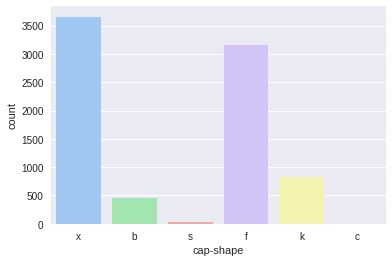

In [10]:
sns.countplot(x="cap-shape", data=train, palette = "pastel");

train[['class','cap-shape']].groupby( ['cap-shape'])['cap-shape'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)

We see nothing strange in the table/graph above. The variables get all the possible meanings.

Now we consider the correlation to poisonousness for each value.

In [11]:
cap_shape = train[['class','cap-shape']].groupby( [train['class'] == 'e', 'cap-shape'])['cap-shape'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)
cap_shape = cap_shape.groupby(['cap-shape'])\
    .apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
cap_shape.drop('level_1',axis =1)

,cap-shape,percent
1,c,100.000000
3,k,72.463768
2,f,49.365482
4,x,46.717724
0,b,10.619469


The table above shows the percentages of poisonousness for mushrooms showing the features given above. For example, the mushroom with conical shaped cap is poisonous 100% of the time for our dataset, whereas the convex shaped one happens to be poisonous 46% of the times. The shapes that are edible for 100% of mushrooms aren't listed on the table above. In this case the non-listed one is 's', sunken shape, which is always edible for our dataset.

Now we plot a graph to visualise the results above and make sure we were right. The graph below shows how many of each possible variable values happens to be poisonous and how manny happens to be edible. Given with orange and green colours respectively.

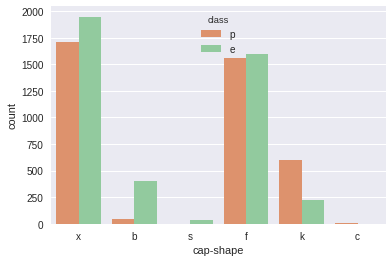

In [12]:
sns.countplot(x="cap-shape", hue = "class", data=train, palette=class_colours);

We follow the same pattern for the rest too.

**Cap Surface**

Values: fibrous ('f'), grooves ('g'), scaly ('y'), smooth ('s')

Graph showing the count of each value this feature gets:

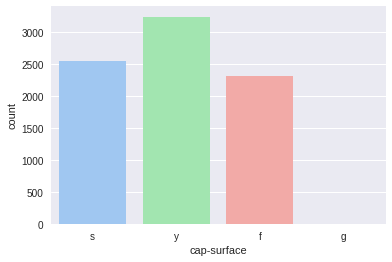

In [13]:
sns.countplot(x="cap-surface", data=train, palette = "pastel");

The results again show that we needn't drop this feature. Below we have correlation table and graph.

In [14]:
cap_surface = train[['class','cap-surface']].groupby( [train['class'] == 'e', 'cap-surface'])['cap-surface']\
    .count().reset_index(name='count').sort_values(['count'], ascending=False)
cap_surface = cap_surface.groupby(['cap-surface'])\
    .apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
cap_surface

,cap-surface,level_1,percent
1,g,1,100.000000
2,s,2,55.242567
3,y,3,53.637485
0,f,0,32.758621


We again get a value, mushroom with a groovy surface, that is always poisonous in our dataset. Graph proves our point by visualising and also showing how rare groovy surface is in itself.

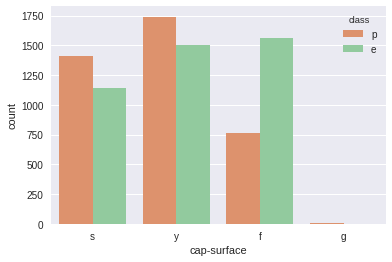

In [15]:
sns.countplot(x="cap-surface", hue = "class", data=train, palette=class_colours)

**Cap Colour**

Values: brown ('n'), buff ('b'), cinnamon ('c'), gray ('g'), green ('r'), pink ('p'), purple ('u'), red ('e'), white ('w'), yellow ('y').

Graph showing the count of each value this feature gets:

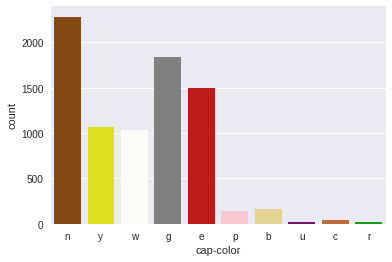

In [16]:
sns.countplot(x="cap-color", data=train, palette = colour_palette)

Correlation to poisonousness only.

In [17]:
cap_colour = train[['class','cap-color']].groupby( [train['class'] == 'e', 'cap-color'])['cap-color']\
    .count().reset_index(name='count').sort_values(['count'], ascending=False)
cap_colour = cap_colour.groupby(['cap-color'])\
    .apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
cap_colour

,cap-color,level_1,percent
0,b,0,71.428571
7,y,7,62.686567
5,p,5,61.111111
2,e,2,58.400000
4,n,4,44.658494
3,g,3,43.913043
6,w,6,30.769231
1,c,1,27.272727


Graph showing correlation to poisonousness and edibility.

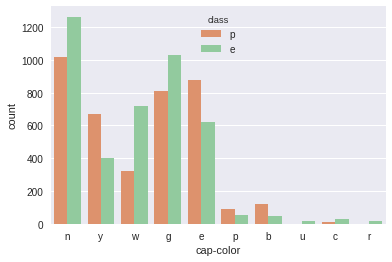

In [18]:
sns.countplot(x="cap-color", hue = "class", data=train, palette=class_colours)

**Cap Colour Distributions**

Visualisation of colour distributions in other cap related features, first the shape and then the surface.

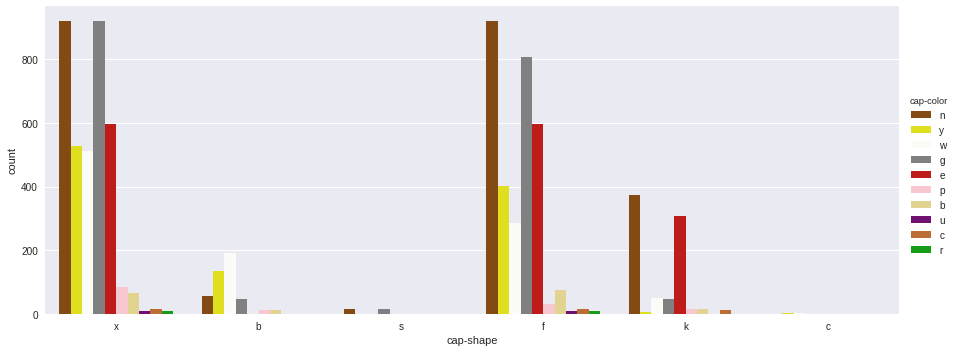

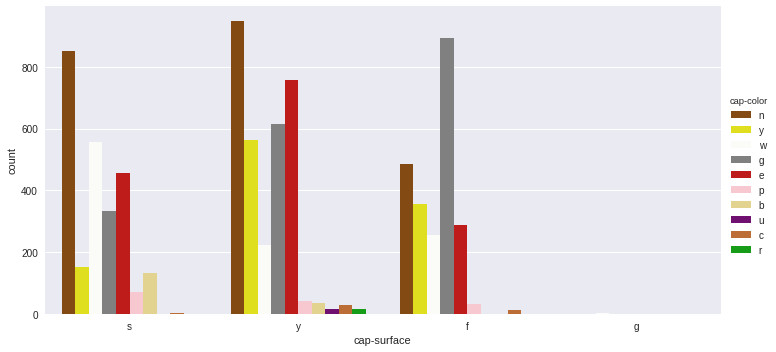

In [19]:
sns.factorplot(x="cap-shape", hue = "cap-color", data=train, kind = "count", size = 5, aspect=2.5, palette = colour_palette)
sns.factorplot(x="cap-surface", hue = "cap-color", data=train, kind = "count", size = 5, aspect=2, palette = colour_palette)

**Adjustements**

Cap shape:

According to the results of our analysis, we don't have to drop this feature nor lessen its possible values as each of them gives unique result. So we can go straight to turning them into numeric discrete features so that our machine learning models can read it easier.

In [20]:
train['cap-shape'] = train['cap-shape'].map({'x' : 0, 'b' : 1, 's' : 2, 'f' : 3, 'k' : 4, 'c' : 5}).astype(int)

Cap surface:

We don't need to drop anything again.

In [21]:
train['cap-surface'] = train['cap-surface'].map({'s' : 0, 'y' : 1, 'f' : 2, 'g' : 3}).astype(int)

Cap colour:

This time we have 'r' and 'u' features which are eidble, they will be changed to the same number because they give the exact same results.

In [22]:
train['cap-color'] = train['cap-color'].map({'n' : 0, 'y' : 1, 'w' : 2, 'g' : 3, 'e' : 4,\
                                            'p' : 5, 'b' : 6, 'u' : 7, 'c' : 8, 'r' : 7}).astype(int)

**Bruises**

Values: true ('t'), false ('f').

Graph showing the count of each value this feature gets:

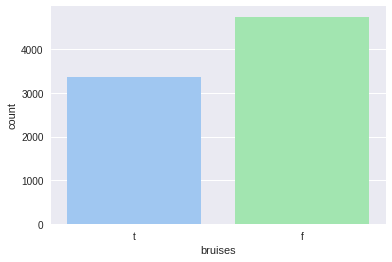

In [23]:
sns.countplot(x="bruises", data=train, palette = "pastel")

Each possible variable correlation to poisonousness.

In [24]:
bruises = train[['class','bruises']].groupby( [train['class'] == 'e', 'bruises'])['bruises'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)
bruises = bruises.groupby(['bruises'])\
    .apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
bruises

,bruises,level_1,percent
0,f,0,69.334457
1,t,1,18.483412


Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

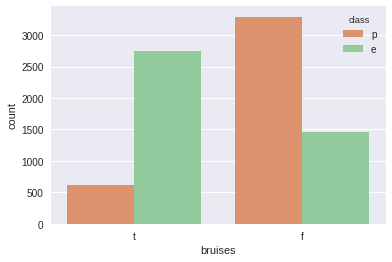

In [25]:
sns.countplot(x="bruises", hue = "class", data=train, palette=class_colours)

**Adjustements**

Nothing special either, we will just number the true and false values.

In [26]:
train['bruises'] = train['bruises'].map({'f' : 0, 't' : 1}).astype(int)

**Odor**

Values: almond ('a'), anise ('l'), creosote ('c'), fishy ('y'), foul ('f'), musty ('m'), none ('n'), pungent ('p'), spicy ('s').

Graph showing the count of each value this feature gets:

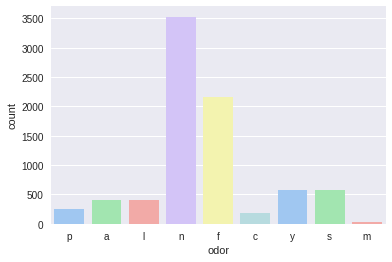

In [27]:
sns.countplot(x="odor", data=train, palette = "pastel")

Each possible variable correlation to poisonousness.

In [28]:
odor = train[['class','odor']].groupby( [train['class'] == 'e', 'odor'])['odor'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)
odor = odor.groupby(['odor']).apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
odor

,odor,level_1,percent
0,c,0,100.000000
1,f,1,100.000000
2,m,2,100.000000
4,p,4,100.000000
5,s,5,100.000000
6,y,6,100.000000
3,n,3,3.401361


Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

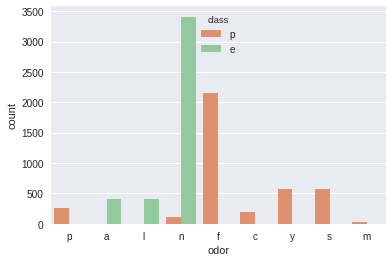

In [29]:
sns.countplot(x="odor", hue = "class", data=train, palette=class_colours)

**Adjustements**

We see that six valuse ('p', 'f', 'c', 'y', 's', 'm') are always poisonous so we'll number them with the same number. We'll act likewise about 'a' and 'l' which are always edible.

In [30]:
train['odor'] = train['odor'].map( {'c': 0,'f': 0,'m': 0,'p': 0,'s': 0,'y': 0, 'a': 1, 'l': 1, 'n': 2} ).astype(int)

**Gill Attachment**

Values: attached ('a'), descending ('d'), free ('f'), notched ('n').

Graph showing the count of each value this feature gets:

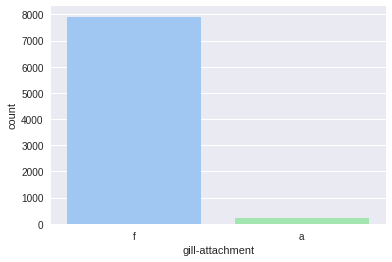

In [31]:
sns.countplot(x="gill-attachment", data=train, palette = "pastel")

Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

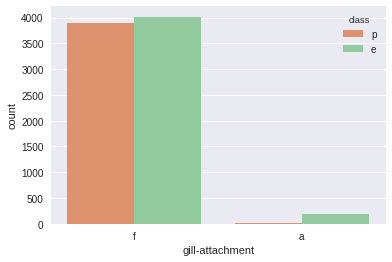

In [32]:
sns.countplot(x="gill-attachment", hue = "class", data=train, palette=class_colours)

**Gill Spacing**

Values: close ('c'), crowded ('w'), distant ('d').

Graph showing the count of each value this feature gets:

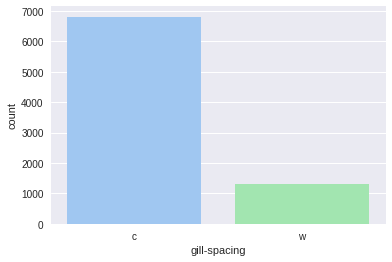

In [33]:
sns.countplot(x="gill-spacing", data=train, palette = "pastel")

Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

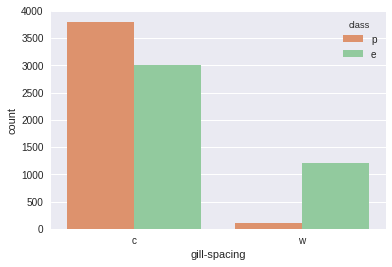

In [34]:
sns.countplot(x="gill-spacing", hue = "class", data=train, palette=class_colours)

**Gill Size**

Values: broad ('b'), narrow ('n').

Graph showing the count of each value this feature gets:

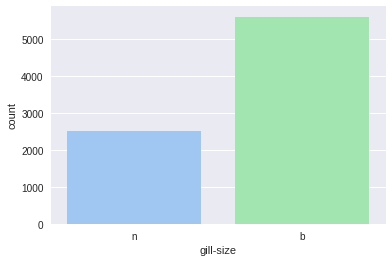

In [35]:
sns.countplot(x="gill-size", data=train, palette = "pastel")

Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

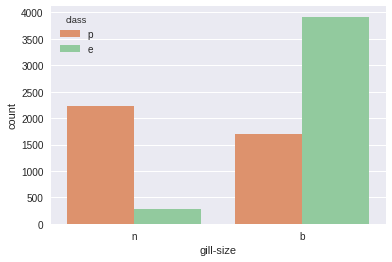

In [36]:
sns.countplot(x="gill-size", hue = "class", data=train, palette=class_colours)

**Gill Colour**

Values: black ('k'), brown ('n'), buff ('b'), chocolate ('h'), gray ('g').

Graph showing the count of each value this feature gets:

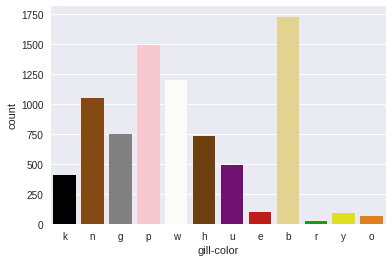

In [37]:
sns.countplot(x="gill-color", data=train, palette = colour_palette)

Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

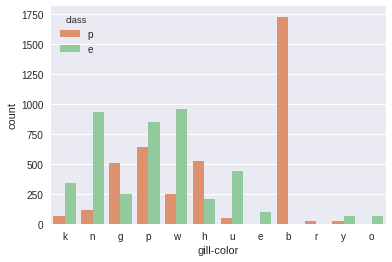

In [38]:
sns.countplot(x="gill-color", hue = "class", data=train, palette=class_colours)

**Gill Colour Distributions**

Colour distributions in other gill related features: attachment, spacing and the size.

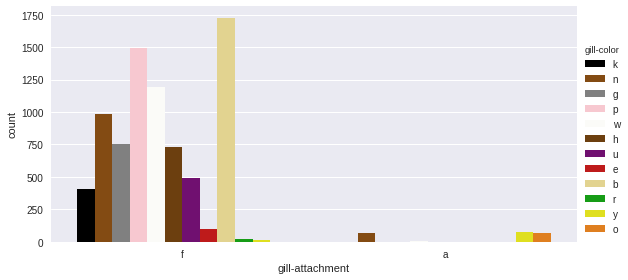

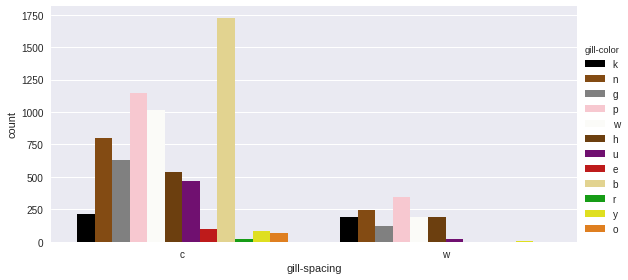

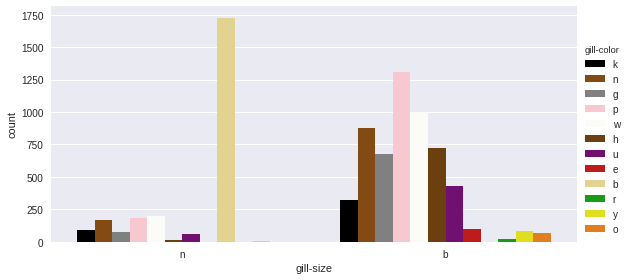

In [39]:
sns.factorplot(x="gill-attachment", hue = "gill-color", data=train, kind = "count", size = 4, aspect=2.0, palette = colour_palette)
sns.factorplot(x="gill-spacing", hue = "gill-color", data=train, kind = "count", size = 4, aspect=2.0, palette = colour_palette)
sns.factorplot(x="gill-size", hue = "gill-color", data=train, kind = "count", size = 4, aspect=2.0, palette = colour_palette)

**Adjustements**

Gill attachment, spacing and size adjustments:

We needn't drop any values or features in these three cases.

In [40]:
train['gill-attachment'] = train['gill-attachment'].map({'f' : 0, 'a' : 1}).astype(int)

In [41]:
train['gill-spacing'] = train['gill-spacing'].map({'c' : 0, 'w' : 1}).astype(int)

In [42]:
train['gill-size'] = train['gill-size'].map({'n' : 0, 'b' : 1}).astype(int)

Gill colour:

In this case two values are always poisonous and two other are always edible, so we'll number them the same way.

In [43]:
train['gill-color'] = train['gill-color'].map({'k' : 0, 'n' : 1, 'g' : 2, 'p' : 3, 'w' : 4, 'h' : 5,\
                                               'u' : 6, 'e' : 7, 'b' : 8, 'r' : 8, 'y' : 9, 'o' : 7}).astype(int)

**Stalk Shape**

Values: enlarging ('e'), tapering ('t').

Graph showing the count of each value this feature gets:

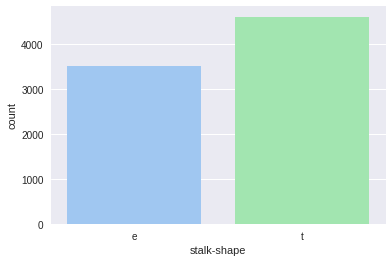

In [44]:
sns.countplot(x="stalk-shape", data=train, palette = "pastel")

Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

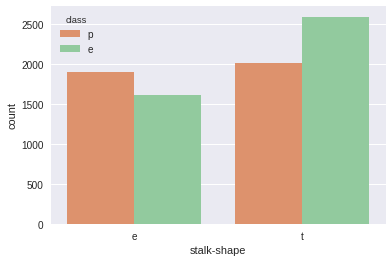

In [46]:
sns.countplot(x="stalk-shape", hue = "class", data=train, palette=class_colours)

**Adjustements**

Nothing special.

In [47]:
train['stalk-shape'] = train['stalk-shape'].map({'e' : 0, 't' : 1}).astype(int)

**Stalk Root**

Values: bulbous ('b'), club ('c'), cup ('u'), equal ('e'), rhizomorphs ('z'), rooted ('r'), missing ('?').

Graph showing the count of each value this feature gets:

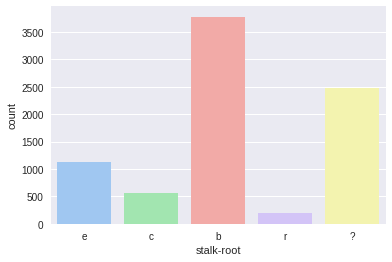

In [48]:
sns.countplot(x="stalk-root", data=train, palette = "pastel")

Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

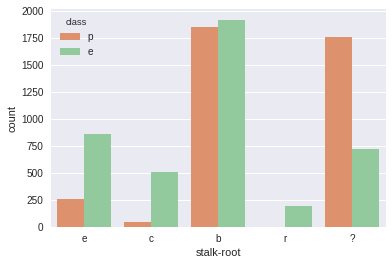

In [50]:
sns.countplot(x="stalk-root", hue = "class", data=train, palette=class_colours)

**Adjustements**

Nothing special.

In [51]:
train['stalk-root'] = train['stalk-root'].map({'e' : 0, 'c' : 1, 'b' : 2, 'r' : 3, '?' : 4}).astype(int)

**Stalk Surface Above Ring**

Values: fibrous ('f'), scaly ('y'), silky ('k'), smooth ('s').

Graph showing the count of each value this feature gets:

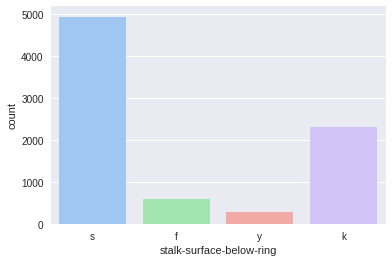

In [52]:
sns.countplot(x="stalk-surface-below-ring", data=train, palette = "pastel")

Each possible variable correlation to poisonousness.

In [53]:
stalk_surface_above_ring = train[['class','stalk-surface-above-ring']].groupby( [train['class'] == 'e', 'stalk-surface-above-ring'])['stalk-surface-above-ring'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)
stalk_surface_above_ring = stalk_surface_above_ring.groupby(['stalk-surface-above-ring']).apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
stalk_surface_above_ring

,stalk-surface-above-ring,level_1,percent
1,k,1,93.929174
3,y,3,33.333333
2,s,2,29.675425
0,f,0,26.086957


Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

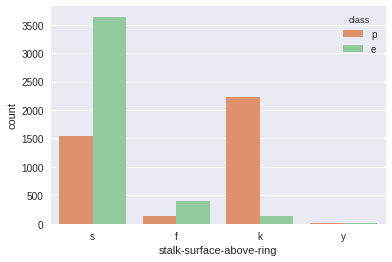

In [54]:
sns.countplot(x="stalk-surface-above-ring", hue = "class", data=train, palette=class_colours)

**Stalk Surface Below Ring**

Values: fibrous ('f'), scaly ('y'), silky ('k'), smooth ('s').

Graph showing the count of each value this feature gets:

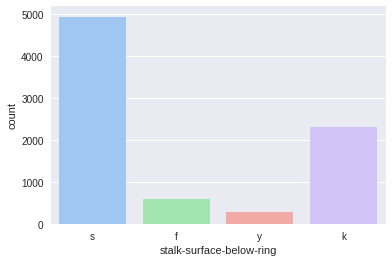

In [55]:
sns.countplot(x="stalk-surface-below-ring", data=train, palette = "pastel")

Each possible variable correlation to poisonousness.

In [56]:
stalk_surface_below_ring = train[['class','stalk-surface-below-ring']].groupby( [train['class'] == 'e', 'stalk-surface-below-ring'])['stalk-surface-below-ring'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)
stalk_surface_below_ring = stalk_surface_below_ring.groupby(['stalk-surface-below-ring']).apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
stalk_surface_below_ring

,stalk-surface-below-ring,level_1,percent
1,k,1,93.750000
2,s,2,31.118314
3,y,3,26.760563
0,f,0,24.000000


Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

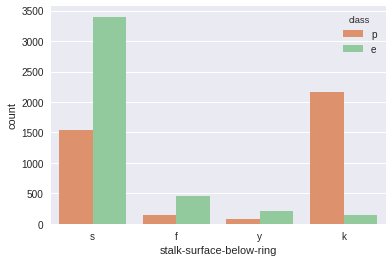

In [978]:
sns.countplot(x="stalk-surface-below-ring", hue = "class", data=train, palette=class_colours)

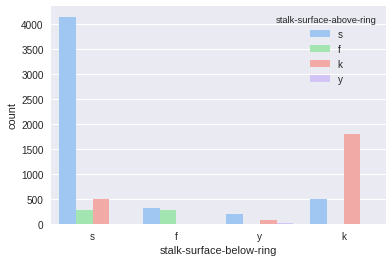

In [60]:
sns.countplot(x="stalk-surface-below-ring", hue = "stalk-surface-above-ring", data=train, palette="pastel")

**Adjustements**

The graph showing the distribution of values correlating the above and below colour features.

/home/mariam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


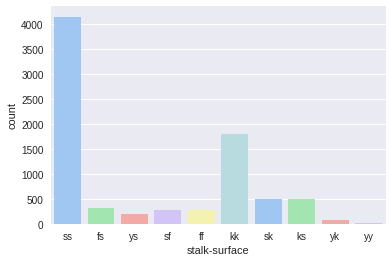

In [61]:
stalk_surface = train[['stalk-surface-below-ring','stalk-surface-above-ring']]
stalk_surface['stalk-surface'] = stalk_surface['stalk-surface-below-ring'] + stalk_surface['stalk-surface-above-ring']
sns.countplot(x="stalk-surface", data=stalk_surface, palette = "pastel")

In [62]:
train.loc[train['stalk-surface-below-ring'] == train['stalk-surface-above-ring']]['stalk-surface-below-ring'].count()

6256

In [63]:
train = train.drop(['stalk-surface-below-ring'], axis = 1)
train = train.drop(['stalk-surface-above-ring'], axis = 1)
train['stalk-surface'] = stalk_surface['stalk-surface']

Mapping

In [64]:
train['stalk-surface'] = train['stalk-surface'].map({'ff' : 0, 'kk' : 1, 'ss' : 2, 'yy' : 3, 'sf' : 4,\
                                                     'sk' : 5, 'yk' : 6, 'fs' : 7,'ks' : 8, 'ys' : 9}).astype(int)

**Stalk Colour Above Ring**

Values: brown ('n'), buff ('b'), cinnamon ('c'), gray ('g'), green ('r'), pink ('p'), red ('e'), white ('w'), yellow ('y').

Graph showing the count of each value this feature gets:

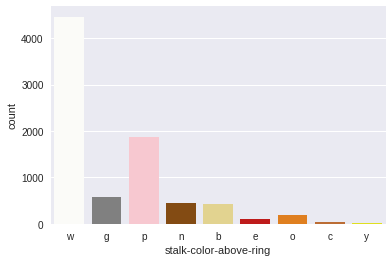

In [66]:
sns.countplot(x="stalk-color-above-ring", data=train, palette = colour_palette)

Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

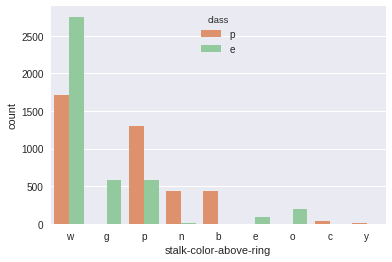

In [68]:
sns.countplot(x="stalk-color-above-ring", hue = "class", data=train, palette=class_colours)

**Stalk Colour Below Ring**

Values: brown ('n'), buff ('b'), cinnamon ('c'), gray ('g'), green ('r'), pink ('p'), red ('e'), white ('w'), yellow ('y').

Graph showing the count of each value this feature gets:

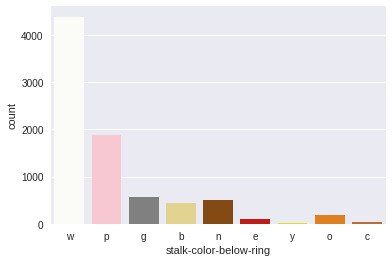

In [69]:
sns.countplot(x="stalk-color-below-ring", data=train, palette = colour_palette)

Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

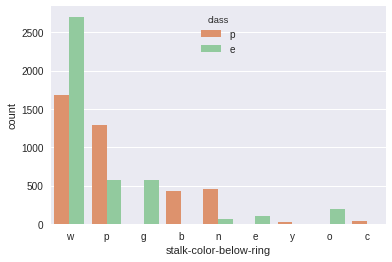

In [71]:
sns.countplot(x="stalk-color-below-ring", hue = "class", data=train, palette=class_colours)

**Adjustements**

Graph showing new joined values.

/home/mariam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


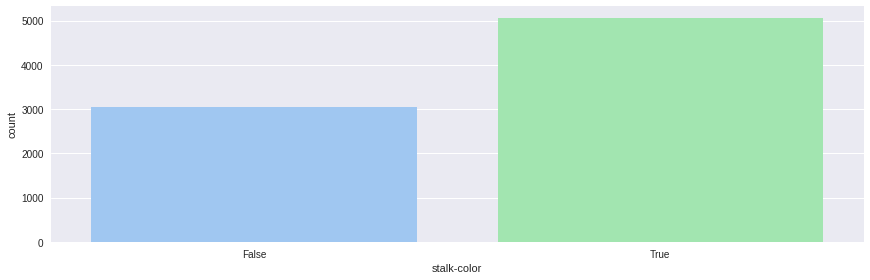

In [73]:
stalk_color = train[['stalk-color-below-ring','stalk-color-above-ring']]
stalk_color['stalk-color'] = stalk_color['stalk-color-below-ring'] == stalk_color['stalk-color-above-ring']
sns.factorplot(x="stalk-color", data=stalk_color, palette = "pastel", kind = "count", aspect = 3)

In [74]:
stalk_color.loc[stalk_color['stalk-color-below-ring'] == stalk_color['stalk-color-above-ring']]['stalk-color'].count()

5068

In [75]:
train = train.drop(['stalk-color-below-ring'], axis = 1)
train = train.drop(['stalk-color-above-ring'], axis = 1)
train['stalk-color'] = stalk_color['stalk-color']

Mapping

In [76]:
train.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-root,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-surface,stalk-color
8119,e,4,0,0,0,2,1,0,1,9,...,4,p,o,o,p,b,c,l,2,True
8120,e,0,0,0,0,2,1,0,1,9,...,4,p,n,o,p,b,v,l,2,True
8121,e,3,0,0,0,2,1,0,1,1,...,4,p,o,o,p,b,c,l,2,True
8122,p,4,1,0,0,0,0,0,0,8,...,4,p,w,o,e,w,v,l,8,True
8123,e,0,0,0,0,2,1,0,1,9,...,4,p,o,o,p,o,c,l,2,True


In [77]:
train['stalk-color'] = train['stalk-color'].map({False : 0, True : 1}).astype(int)

**Veil Type**

Graph and table showing the count of each value this feature gets:

In [78]:
train[['class','veil-type']].groupby( ['veil-type'])['veil-type'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)

,veil-type,count
0,p,8124


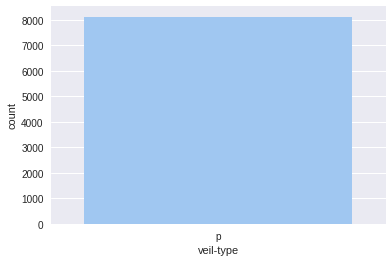

In [79]:
sns.countplot(x="veil-type", data=train, palette = "pastel");

**Adjustements**

Since this feature gets only one possible value and therefore doesn't affect our main problem at all, we drop it.

In [80]:
train = train.drop(['veil-type'], axis = 1)

**Veil Colour**

Graph showing the count of each value this feature gets:

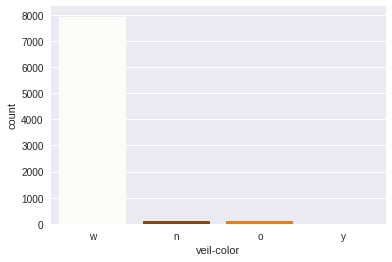

In [81]:
sns.countplot(x="veil-color", data=train, palette = colour_palette);

In [82]:
veil = train[['class','veil-color']].groupby( [train['class'] == 'e', 'veil-color'])['veil-color'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)
veil = veil.groupby(['veil-color'])\
    .apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
veil

,veil-color,level_1,percent
1,y,1,100.000000
0,w,0,49.318526


Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

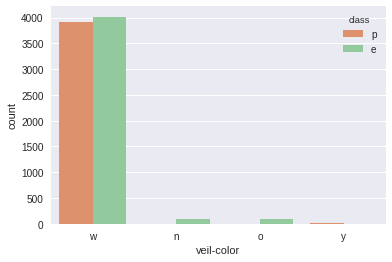

In [83]:
sns.countplot(x="veil-color", hue = "class", data=train, palette=class_colours);

The percentage table to make sure that 'n' and 'o' are never poisonous.

In [84]:
odor = train[['class','veil-color']].groupby( [train['class'] == 'e', 'veil-color'])['veil-color'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)
odor = odor.groupby(['veil-color']).apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
odor

,veil-color,level_1,percent
1,y,1,100.000000
0,w,0,49.318526


**Adjustements**

'n' and 'o' are always edible therefore we number them the same way.

In [85]:
train['veil-color'] = train['veil-color'].map({'w' : 0, 'n' : 1, 'o' : 1, 'y' : 2 }).astype(int)

**Ring Number**

Values: none ('n'), one ('o'), two ('t').

Graph showing the count of each value this feature gets:

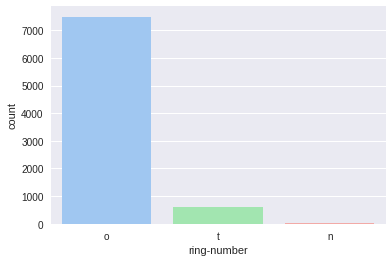

In [86]:
sns.countplot(x="ring-number", data=train, palette = "pastel")

Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

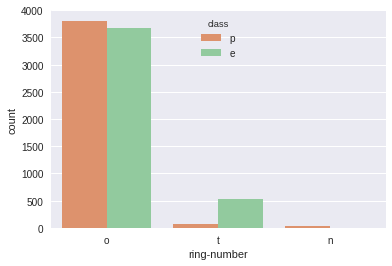

In [88]:
sns.countplot(x="ring-number", hue = "class", data=train, palette=class_colours)

**Adjustements**

We map the values. They are essentially descrete ones just put as string rather than categorical, so we'll number them according to what each string stands for.

In [89]:
train['ring-number'] = train['ring-number'].map({'n' : 0, 'o' : 1, 't' : 2 }).astype(int)

Correlation between ring type and ring number:

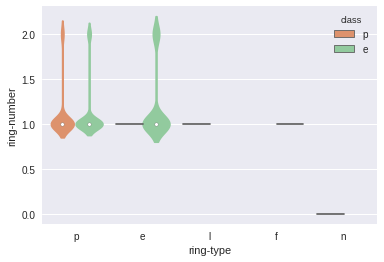

In [90]:
sns.violinplot(x="ring-type", y="ring-number", hue="class", data=train, palette=class_colours);

**Ring Type**

Values: cobwebby ('c'), evanescent ('e'), flaring ('f'), large ('l'), none ('n'), pendant ('p'), sheathing ('s'), zone ('z').

Graph showing the count of each value this feature gets:

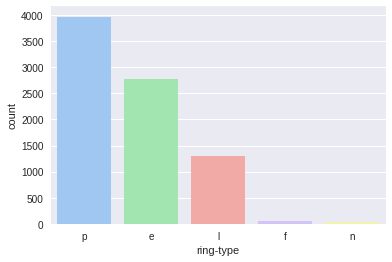

In [91]:
sns.countplot(x="ring-type", data=train, palette = "pastel")

Each possible variable correlation to poisonousness.

In [92]:
ring_type = train[['class','ring-type']].groupby( [train['class'] == 'e', 'ring-type'])['ring-type'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)
ring_type = ring_type.groupby(['ring-type']).apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
ring_type

,ring-type,level_1,percent
1,l,1,100.000000
2,n,2,100.000000
0,e,0,63.688761
3,p,3,20.564516


Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

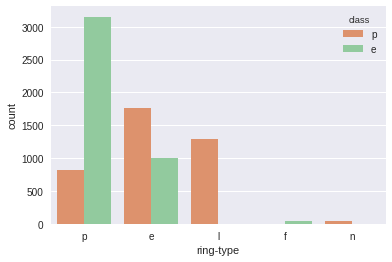

In [93]:
sns.countplot(x="ring-type", hue = "class", data=train, palette=class_colours)

**Adjustements**

'l' and 'n' are always poisonous.

In [94]:
train['ring-type'] = train['ring-type'].map({'p' : 0, 'e' : 1, 'l' : 2, 'f' : 3, 'n' : 2 }).astype(int)

**Spore Print Colour**

Values: black ('k'), brown ('n'), buff ('b'), chocolate ('h'), green ('r'), orange ('o'), purple ('u'), white ('w'), yellow ('y').

Graph showing the count of each value this feature gets:

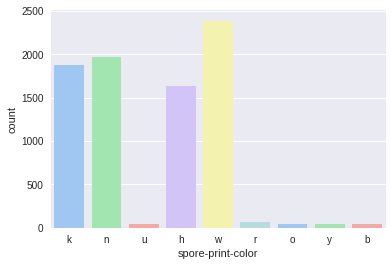

In [95]:
sns.countplot(x="spore-print-color", data=train, palette = "pastel")

Each possible variable correlation to poisonousness.

In [96]:
spore_print_color = train[['class','spore-print-color']].groupby( [train['class'] == 'e', 'spore-print-color'])['spore-print-color'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)
spore_print_color = spore_print_color.groupby(['spore-print-color']).apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
spore_print_color

,spore-print-color,level_1,percent
3,r,3,100.000000
0,h,0,97.058824
4,w,4,75.879397
1,k,1,11.965812
2,n,2,11.382114


Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

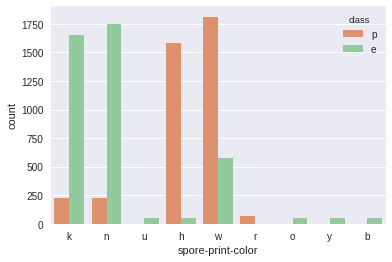

In [97]:
sns.countplot(x="spore-print-color", hue = "class", data=train, palette=class_colours)

**Adjustements**

'u','o','y' and 'b' are always edible.

In [98]:
train['spore-print-color'] = train['spore-print-color'].map({'k' : 0, 'n' : 1, 'u' : 2, 'h' : 3, 'w' : 4,\
                                                             'r' : 5, 'o' : 2, 'y' : 2, 'b' : 2}).astype(int)

**Population**

Values: abundant ('a'), clustered ('c'), numerous ('n'), scattered ('s'), several ('v'), solitary ('y').

Graph showing the count of each value this feature gets:

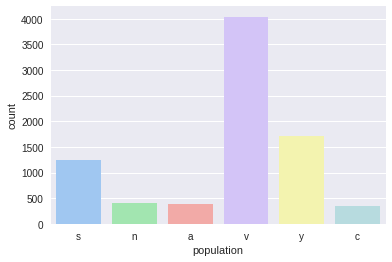

In [99]:
sns.countplot(x="population", data=train, palette = "pastel")

Each possible variable correlation to poisonousness.

In [100]:
population = train[['class','population']].groupby( [train['class'] == 'e', 'population'])['population'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)
population = population.groupby(['population']).apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
population

,population,level_1,percent
2,v,2,70.495050
3,y,3,37.850467
1,s,1,29.487179
0,c,0,15.294118


Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

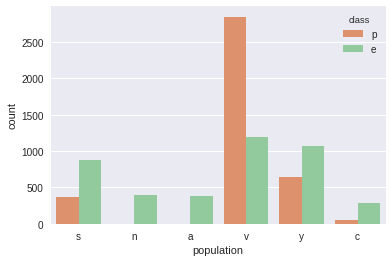

In [101]:
sns.countplot(x="population", hue = "class", data=train, palette=class_colours)

**Adjustements**

'n', and 'a' are always edible.

In [102]:
train['population'] = train['population'].map({'s' : 0, 'n' : 1, 'a' : 1, 'v' : 2,\
                                               'y' : 3, 'c' : 4}).astype(int)

**Habitat**

Values: grasses ('g'), leaves ('l'), meadows ('m'), paths ('p'), urban ('u'), waste ('w'), woods ('d').

Graph showing the count of each value this feature gets:

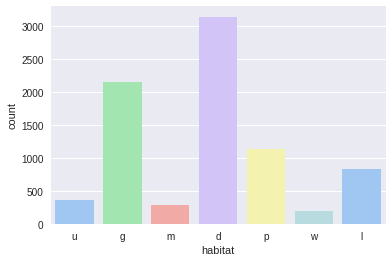

In [103]:
sns.countplot(x="habitat", data=train, palette = "pastel")

Each possible variable correlation to poisonousness.

In [104]:
habitat = train[['class','habitat']].groupby( [train['class'] == 'e', 'habitat'])['habitat'].count()\
    .reset_index(name='count').sort_values(['count'], ascending=False)
habitat = habitat.groupby(['habitat']).apply(lambda x: 100 * x.loc[x['class'] == False]['count'] / x['count'].sum())\
    .reset_index(name='percent').sort_values(['percent'], ascending=False)
habitat

,habitat,level_1,percent
4,p,4,88.111888
5,u,5,73.913043
2,l,2,71.153846
0,d,0,40.279543
1,g,1,34.450652
3,m,3,12.328767


Graph showing how many of each possible variable values happens to be poisonous and how manny happens to be edible.

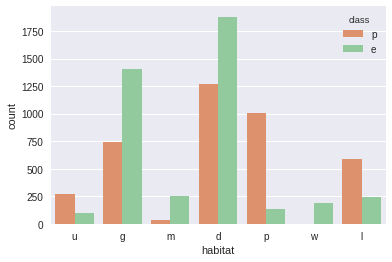

In [105]:
sns.countplot(x="habitat", hue = "class", data=train, palette=class_colours)

**Adjustements**

Nothing special.

In [106]:
train['habitat'] = train['habitat'].map({'u' : 0, 'g' : 1, 'm' : 2, 'd' : 3,\
                                        'p' : 4, 'w' : 5, 'l' : 6}).astype(int)

And the last but not least, 

**The label column adjustement:**

In [107]:
train['class'] = train['class'].map({'e' : 1, 'p' : 0}).astype(int)

In [108]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-surface,stalk-color
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1
1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,0,1,1,1,2,1
2,1,1,0,2,1,1,0,0,1,1,0,1,0,1,0,1,1,2,2,1
3,0,0,1,2,1,0,0,0,0,1,0,0,0,1,0,0,0,0,2,1
4,1,0,0,3,0,2,0,1,1,0,1,0,0,1,1,1,1,1,2,1


In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 20 columns):
class                8124 non-null int64
cap-shape            8124 non-null int64
cap-surface          8124 non-null int64
cap-color            8124 non-null int64
bruises              8124 non-null int64
odor                 8124 non-null int64
gill-attachment      8124 non-null int64
gill-spacing         8124 non-null int64
gill-size            8124 non-null int64
gill-color           8124 non-null int64
stalk-shape          8124 non-null int64
stalk-root           8124 non-null int64
veil-color           8124 non-null int64
ring-number          8124 non-null int64
ring-type            8124 non-null int64
spore-print-color    8124 non-null int64
population           8124 non-null int64
habitat              8124 non-null int64
stalk-surface        8124 non-null int64
stalk-color          8124 non-null int64
dtypes: int64(20)
memory usage: 1.2 MB


In [110]:
train.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-surface,stalk-color
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,1.637617,0.971935,2.089611,0.415559,0.967011,0.025849,0.161497,0.690793,4.229197,0.567208,2.290005,0.025603,1.069424,0.687346,2.112260,1.890694,2.794682,2.738060,0.623831
std,0.499708,1.588969,0.775534,1.731403,0.492848,0.948973,0.158695,0.368011,0.462195,2.586798,0.495493,1.334434,0.164074,0.271064,0.760487,1.614962,1.037932,1.617549,2.243422,0.484453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000
75%,1.000000,3.000000,2.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,6.000000,1.000000,4.000000,0.000000,1.000000,1.000000,4.000000,3.000000,4.000000,2.000000,1.000000
max,1.000000,5.000000,3.000000,8.000000,1.000000,2.000000,1.000000,1.000000,1.000000,9.000000,1.000000,4.000000,2.000000,2.000000,3.000000,5.000000,4.000000,6.000000,9.000000,1.000000


# Machine Learning

Now we start the machine learning process. Our problem is a classification problem and of a supervised learning type. We will discuss several models and how they work for the given train set. Then we'll evaluate the best model for our dataset.

The models we are going to use are:
* Logistic Regression
* KNN
* SVMs
* Neural Networks
* Gaussian Naive Bayes
* Perceptron
* Decision Tree
* Random Forest

**Train/Test Split**

Since we are given only one dataset, we split it to derive a test set. We'll do this in standard 80/20 ratio.

In [924]:
train_matrix = train.as_matrix()

In [925]:
n,m = train_matrix.shape
n,m

(8124, 20)

In [927]:
t = round(train_matrix.shape[0]*0.80)

Y_train = train_matrix[0:t, 0:1].copy().ravel()
X_train = train_matrix[0:t, 1:m].copy()
Y_test = train_matrix[t:n, 0:1].copy()
X_test = train_matrix[t:n, 1:m].copy()

**Cross-Validation**

Now we cross-validate our training data. Cross-validation is a technique that assesses the average error of a model during training procedure on an unseen data, for which it divides the training dataset into training and validation sets. It consists of several rounds of fitting our model to a part of the given training dataset and then predicting the validation set. Overall the technique calculates the average performance of all rounds for each model.

We'll choose the model that performs the best on cross-validation sets/has the best average performance. Afterwards we'll run it on the initial train and test sets.

For better estimation of each model's performance, we'll do three rounds of cross-validation. We are using splits of 80/20, 75/25 and 70/30 for our dataset.

In [973]:
cr = round(t*0.80)
X_train_cross= X_train[0:cr ,].copy()
Y_train_cross= Y_train[0:cr ,].copy()
X_test_cross= X_train[cr:t ,].copy()
Y_test_cross= Y_train[cr:t ,].copy()

cr = round(t*0.75)
X_train_cross2= X_train[0:cr ,].copy()
Y_train_cross2= Y_train[0:cr ,].copy()
X_test_cross2= X_train[cr:t ,].copy()
Y_test_cross2= Y_train[cr:t ,].copy()

cr = round(t*0.70)
X_train_cross3= X_train[0:cr ,].copy()
Y_train_cross3= Y_train[0:cr ,].copy()
X_test_cross3= X_train[cr:t ,].copy()
Y_test_cross3= Y_train[cr:t ,].copy()

In [929]:
accuracy_scores = {}

**Logistic Regression**

Logistic regression is a regression model that calculates the probability of a certain categorical variable happening depending on the other variables/features. Logistic regression works with binary classification only which is really useful in our case since our classification problem is the binary one. For all this logistic regression uses the logistic function:

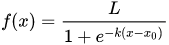

In [931]:
logreg = LogisticRegression()
logreg.fit(X_train_cross, Y_train_cross)
Y_pred_cross = logreg.predict(X_test_cross)
accuracy_scores['Logistic Regression'] = accuracy_score(Y_test_cross, Y_pred_cross)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross, Y_pred_cross))

Accuracy: 0.9908


In [932]:
logreg = LogisticRegression()
logreg.fit(X_train_cross2, Y_train_cross2)
Y_pred_cross2 = logreg.predict(X_test_cross2)
accuracy_scores['Logistic Regression'] += accuracy_score(Y_test_cross2, Y_pred_cross2)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross2, Y_pred_cross2))

Accuracy: 0.9797


In [933]:
logreg = LogisticRegression()
logreg.fit(X_train_cross3, Y_train_cross3)
Y_pred_cross3 = logreg.predict(X_test_cross3)
accuracy_scores['Logistic Regression'] += accuracy_score(Y_test_cross3, Y_pred_cross3)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross3, Y_pred_cross3))

Accuracy: 0.9569


In [934]:
accuracy_scores['Logistic Regression'] = accuracy_scores['Logistic Regression']/3
print('Avg. Accuracy: %.6f' % accuracy_scores['Logistic Regression'])

Avg. Accuracy: 0.975795


**K Nearest Neighbours**

Knn is a famous algorithm used in classification and regression problems. The algorithm uses k closest training examples to evaluate what class majority of them share and determines the class of current sample based on them. It uses distance functions (euclidean, manhattan, etc.) to calculate which training examples are the closest. We choose k factor = 5, since it gave the best result.

In [935]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_cross, Y_train_cross)
Y_pred_cross = knn.predict(X_test_cross)
accuracy_scores['KNN'] = accuracy_score(Y_test_cross, Y_pred_cross)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross, Y_pred_cross))

Accuracy: 0.9669


In [936]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_cross2, Y_train_cross2)
Y_pred_cross2 = knn.predict(X_test_cross2)
accuracy_scores['KNN'] += accuracy_score(Y_test_cross2, Y_pred_cross2)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross2, Y_pred_cross2))

Accuracy: 0.9040


In [937]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_cross3, Y_train_cross3)
Y_pred_cross3 = knn.predict(X_test_cross3)
accuracy_scores['KNN'] += accuracy_score(Y_test_cross3, Y_pred_cross3)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross3, Y_pred_cross3))

Accuracy: 0.9000


In [938]:
accuracy_scores['KNN'] = accuracy_scores['KNN']/3
print('Avg. Accuracy: %.6f' % accuracy_scores['KNN'])

Avg. Accuracy: 0.923641


**Support Vector Machines**

Support vector machines are a set of supervised learning methods used for classification, regression and outliers detection.

**With Linear Kernel**

The linear kernel calculates the similarity between two samples (feature vectors) simply by their dot product.

In [943]:
linearclf1 = LinearSVC(C=1.0, multi_class='ovr', penalty='l2')
linearclf1.fit(X_train_cross, Y_train_cross)
Y_pred_cross = linearclf1.predict(X_test_cross)
accuracy_scores['SVM Linear Kernel'] = accuracy_score(Y_test_cross, Y_pred_cross)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross, Y_pred_cross))

Accuracy: 0.9885


In [944]:
linearclf1 = LinearSVC(C=1.0, multi_class='ovr', penalty='l2')
linearclf1.fit(X_train_cross2, Y_train_cross2)
Y_pred_cross2 = linearclf1.predict(X_test_cross2)
accuracy_scores['SVM Linear Kernel'] += accuracy_score(Y_test_cross2, Y_pred_cross2)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross2, Y_pred_cross2))

Accuracy: 0.9908


In [945]:
linearclf1 = LinearSVC(C=1.0, multi_class='ovr', penalty='l2')
linearclf1.fit(X_train_cross3, Y_train_cross3)
Y_pred_cross3 = linearclf1.predict(X_test_cross3)
accuracy_scores['SVM Linear Kernel'] += accuracy_score(Y_test_cross3, Y_pred_cross3)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross3, Y_pred_cross3))

Accuracy: 0.9923


In [946]:
accuracy_scores['SVM Linear Kernel'] = accuracy_scores['SVM Linear Kernel']/3
print('Avg. Accuracy: %.6f' % accuracy_scores['SVM Linear Kernel'])

Avg. Accuracy: 0.990513


**With Gaussian Kernel**

Gaussian kernel, also known as radial basis function is a commonly used kernel that is way more specific and accurate than the linear kernel. It calculates the similarity between two samples (feature vectors) using the given function (rbf):

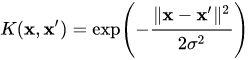

In [939]:
clf = SVC(C=1.0, decision_function_shape='ovr', gamma=0.001, kernel='rbf')
clf.fit(X_train_cross, Y_train_cross)
Y_pred_cross = clf.predict(X_test_cross)
accuracy_scores['SVM Gaussian Kernel'] = accuracy_score(Y_test_cross, Y_pred_cross)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross, Y_pred_cross))

Accuracy: 0.9362


In [940]:
clf = SVC(C=1.0, decision_function_shape='ovr', gamma=0.001, kernel='rbf')
clf.fit(X_train_cross2, Y_train_cross2)
Y_pred_cross2 = clf.predict(X_test_cross2)
accuracy_scores['SVM Gaussian Kernel'] += accuracy_score(Y_test_cross2, Y_pred_cross2)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross2, Y_pred_cross2))

Accuracy: 0.9366


In [941]:
clf = SVC(C=1.0, decision_function_shape='ovr', gamma=0.001, kernel='rbf')
clf.fit(X_train_cross3, Y_train_cross3)
Y_pred_cross3 = clf.predict(X_test_cross3)
accuracy_scores['SVM Gaussian Kernel'] += accuracy_score(Y_test_cross3, Y_pred_cross3)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross3, Y_pred_cross3))

Accuracy: 0.9385


In [942]:
accuracy_scores['SVM Gaussian Kernel'] = accuracy_scores['SVM Gaussian Kernel']/3
print('Avg. Accuracy: %.6f' % accuracy_scores['SVM Gaussian Kernel'])

Avg. Accuracy: 0.937077


**Neural Networks**

Neural networks are algorithms built on model of artificial neurons expressed by several layers. They are inspired by human brain.

In [947]:
model = Sequential()
model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
model.add(Dense(9, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_cross, Y_train_cross, validation_split=0.2, epochs=15, batch_size=20)

Train on 4159 samples, validate on 1040 samples
Epoch 1/15
4159/4159 [==============================] - 2s 447us/step - loss: 0.4825 - acc: 0.8336 - val_loss: 0.4094 - val_acc: 0.9106
Epoch 2/15
4159/4159 [==============================] - 0s 103us/step - loss: 0.0653 - acc: 0.9925 - val_loss: 0.1585 - val_acc: 0.9202
Epoch 3/15
4159/4159 [==============================] - 0s 106us/step - loss: 0.0165 - acc: 0.9990 - val_loss: 0.1552 - val_acc: 0.9288
Epoch 4/15
4159/4159 [==============================] - 0s 107us/step - loss: 0.0085 - acc: 0.9990 - val_loss: 0.1472 - val_acc: 0.9471
Epoch 5/15
4159/4159 [==============================] - 0s 104us/step - loss: 0.0060 - acc: 0.9993 - val_loss: 0.1377 - val_acc: 0.9510
Epoch 6/15
4159/4159 [==============================] - 0s 107us/step - loss: 0.0041 - acc: 0.9995 - val_loss: 0.1818 - val_acc: 0.9317
Epoch 7/15
4159/4159 [==============================] - 0s 110us/step - loss: 0.0039 - acc: 0.9995 - val_loss: 0.1337 - val_acc: 0.9558


In [948]:
scores = model.evaluate(X_test_cross, Y_test_cross)
accuracy_scores['Neural Networks'] = scores[1]
print('\nAccuracy: %.4f' % (scores[1]))

1300/1300 [==============================] - 0s 36us/step

Accuracy: 0.9569


In [949]:
model = Sequential()
model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
model.add(Dense(9, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_cross2, Y_train_cross2, validation_split=0.2, epochs=15, batch_size=20)

Train on 3899 samples, validate on 975 samples
Epoch 1/15
3899/3899 [==============================] - 2s 412us/step - loss: 0.4785 - acc: 0.8489 - val_loss: 0.3977 - val_acc: 0.9508
Epoch 2/15
3899/3899 [==============================] - 0s 112us/step - loss: 0.0744 - acc: 0.9854 - val_loss: 0.1154 - val_acc: 0.9559
Epoch 3/15
3899/3899 [==============================] - 0s 116us/step - loss: 0.0155 - acc: 1.0000 - val_loss: 0.1203 - val_acc: 0.9487
Epoch 4/15
3899/3899 [==============================] - 0s 114us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.1449 - val_acc: 0.9477
Epoch 5/15
3899/3899 [==============================] - 0s 113us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.1694 - val_acc: 0.9456
Epoch 6/15
3899/3899 [==============================] - 0s 114us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.2011 - val_acc: 0.9456
Epoch 7/15
3899/3899 [==============================] - 0s 111us/step - loss: 6.8343e-04 - acc: 1.0000 - val_loss: 0.2265 - val_acc: 0.94

In [950]:
scores = model.evaluate(X_test_cross2, Y_test_cross2)
accuracy_scores['Neural Networks'] += scores[1]
print('\nAccuracy: %.4f' % (scores[1]))

1625/1625 [==============================] - 0s 38us/step

Accuracy: 0.7563


In [951]:
model = Sequential()
model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
model.add(Dense(9, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_cross3, Y_train_cross3, validation_split=0.2, epochs=15, batch_size=20)

Train on 3639 samples, validate on 910 samples
Epoch 1/15
3639/3639 [==============================] - 3s 717us/step - loss: 0.5844 - acc: 0.8392 - val_loss: 1.1421 - val_acc: 0.2956
Epoch 2/15
3639/3639 [==============================] - 0s 118us/step - loss: 0.1625 - acc: 0.9184 - val_loss: 0.1388 - val_acc: 0.9758
Epoch 3/15
3639/3639 [==============================] - 0s 119us/step - loss: 0.0263 - acc: 1.0000 - val_loss: 0.0570 - val_acc: 0.9758
Epoch 4/15
3639/3639 [==============================] - 0s 109us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.0664 - val_acc: 0.9714
Epoch 5/15
3639/3639 [==============================] - 0s 110us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0754 - val_acc: 0.9681
Epoch 6/15
3639/3639 [==============================] - 0s 109us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0854 - val_acc: 0.9681
Epoch 7/15
3639/3639 [==============================] - 0s 109us/step - loss: 9.7205e-04 - acc: 1.0000 - val_loss: 0.0964 - val_acc: 0.96

In [952]:
scores = model.evaluate(X_test_cross3, Y_test_cross3)
accuracy_scores['Neural Networks'] += scores[1]
print('\nAccuracy: %.4f' % (scores[1]))

1950/1950 [==============================] - 0s 38us/step

Accuracy: 0.7851


In [953]:
accuracy_scores['Neural Networks'] = accuracy_scores['Neural Networks']/3
print('Avg. Accuracy: %.6f' % accuracy_scores['Neural Networks'])

Avg. Accuracy: 0.832786


**Gaussian Naive Bayes**

Bayes classifiers are simple probabilistic classifiers that apply Bayes' theorem with the assumption that the features are independent. 

In [954]:
gaussian = GaussianNB()
gaussian.fit(X_train_cross, Y_train_cross)
Y_pred_cross = gaussian.predict(X_test_cross)
accuracy_scores['Gaussian Naive Bayes'] = accuracy_score(Y_test_cross, Y_pred_cross)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross, Y_pred_cross))

Accuracy: 0.8923


In [955]:
gaussian = GaussianNB()
gaussian.fit(X_train_cross2, Y_train_cross2)
Y_pred_cross2 = gaussian.predict(X_test_cross2)
accuracy_scores['Gaussian Naive Bayes'] += accuracy_score(Y_test_cross2, Y_pred_cross2)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross2, Y_pred_cross2))

Accuracy: 0.7188


In [956]:
gaussian = GaussianNB()
gaussian.fit(X_train_cross3, Y_train_cross3)
Y_pred_cross3 = gaussian.predict(X_test_cross3)
accuracy_scores['Gaussian Naive Bayes'] += accuracy_score(Y_test_cross3, Y_pred_cross3)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross3, Y_pred_cross3))

Accuracy: 0.7221


In [957]:
accuracy_scores['Gaussian Naive Bayes'] = accuracy_scores['Gaussian Naive Bayes']/3
print('Avg. Accuracy: %.6f' % accuracy_scores['Gaussian Naive Bayes'])

Avg. Accuracy: 0.777709


**Perceptron**

Perceptrons like logistic regression work on binary classification problems like ours. It makes its assumptions based on a linear predictor function.

In [958]:
perceptron = Perceptron()
perceptron.fit(X_train_cross, Y_train_cross)
Y_pred_cross = perceptron.predict(X_test_cross)
accuracy_scores['Perceptron'] = accuracy_score(Y_test_cross, Y_pred_cross)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross, Y_pred_cross))

Accuracy: 0.9738


/home/mariam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [959]:
perceptron = Perceptron()
perceptron.fit(X_train_cross2, Y_train_cross2)
Y_pred_cross2 = perceptron.predict(X_test_cross2)
accuracy_scores['Perceptron'] += accuracy_score(Y_test_cross2, Y_pred_cross2)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross2, Y_pred_cross2))

Accuracy: 0.9662


/home/mariam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [960]:
perceptron = Perceptron()
perceptron.fit(X_train_cross3, Y_train_cross3)
Y_pred_cross3 = perceptron.predict(X_test_cross3)
accuracy_scores['Perceptron'] += accuracy_score(Y_test_cross3, Y_pred_cross3)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross3, Y_pred_cross3))

Accuracy: 0.9497


/home/mariam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [961]:
accuracy_scores['Perceptron'] = accuracy_scores['Perceptron']/3
print('Avg. Accuracy: %.6f' % accuracy_scores['Perceptron'])

Avg. Accuracy: 0.963248


**Decision Tree**

Decision tree is a classification that uses a decision tree to go from observations about an item to conclusions about the item's target value.

In [962]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_cross, Y_train_cross)
Y_pred_cross = decision_tree.predict(X_test_cross)
accuracy_scores['Decision Tree'] = accuracy_score(Y_test_cross, Y_pred_cross)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross, Y_pred_cross))

Accuracy: 0.9877


In [963]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_cross2, Y_train_cross2)
Y_pred_cross2 = decision_tree.predict(X_test_cross2)
accuracy_scores['Decision Tree'] += accuracy_score(Y_test_cross2, Y_pred_cross2)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross2, Y_pred_cross2))

Accuracy: 0.9902


In [964]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_cross3, Y_train_cross3)
Y_pred_cross3 = decision_tree.predict(X_test_cross3)
accuracy_scores['Decision Tree'] += accuracy_score(Y_test_cross3, Y_pred_cross3)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross3, Y_pred_cross3))

Accuracy: 0.9918


In [965]:
accuracy_scores['Decision Tree'] = accuracy_scores['Decision Tree']/3
print('Avg. Accuracy: %.6f' % accuracy_scores['Decision Tree'])

Avg. Accuracy: 0.989880


**Random Forest**

Random forests are models that are used for classification and regression problems. They operate by constructing several decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [966]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_cross, Y_train_cross)
Y_pred_cross = random_forest.predict(X_test_cross)
random_forest.score(X_train_cross, Y_train_cross)
accuracy_scores['Random Forest'] = accuracy_score(Y_test_cross, Y_pred_cross)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross, Y_pred_cross))

Accuracy: 0.9900


In [967]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_cross2, Y_train_cross2)
Y_pred_cross2 = random_forest.predict(X_test_cross2)
random_forest.score(X_train_cross2, Y_train_cross2)
accuracy_scores['Random Forest'] += accuracy_score(Y_test_cross2, Y_pred_cross2)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross2, Y_pred_cross2))

Accuracy: 0.9951


In [968]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_cross3, Y_train_cross3)
Y_pred_cross3 = random_forest.predict(X_test_cross3)
random_forest.score(X_train_cross3, Y_train_cross3)
accuracy_scores['Random Forest'] += accuracy_score(Y_test_cross3, Y_pred_cross3)
print('Accuracy: %.4f' % accuracy_score(Y_test_cross3, Y_pred_cross3))

Accuracy: 0.9856


In [969]:
accuracy_scores['Random Forest'] = accuracy_scores['Random Forest']/3
print('Avg. Accuracy: %.6f' % accuracy_scores['Random Forest'])

Avg. Accuracy: 0.990239


### Model Evaluation

In [970]:
models = pd.DataFrame({
    'Model': list(accuracy_scores.keys()),
    'Score': list(accuracy_scores.values())})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,SVM Linear Kernel,0.990513
8,Random Forest,0.990239
7,Decision Tree,0.989880
0,Logistic Regression,0.975795
6,Perceptron,0.963248
2,SVM Gaussian Kernel,0.937077
1,KNN,0.923641
4,Neural Networks,0.832786
5,Gaussian Naive Bayes,0.777709


According to the results above, SVM with linear (no) kernel validates the best on our training set. Now we run it on our initial train and test sets:

In [971]:
linearclf = LinearSVC(C=1.0, multi_class='ovr', penalty='l2')
linearclf.fit(X_train, Y_train)
Y_pred_lin = linearclf.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(Y_test, Y_pred_lin))

Accuracy: 1.0000


Such high performance is mostly due to detailed and good features that help us define the poisonousness of a mushroom. 